In [17]:
import sys
sys.path.append('../../../')
import helper

import numpy as np
import matplotlib.pyplot as plt

In [18]:
results = helper.get_filenames_results()
for key in results:
    print(str(key) + ': ' + str(helper.get_params_results(key)))

X_100_DL: {'dataset_name': '3', 'method': 'dog-leg', 'init_dist_x': 100, 'init_dist_y': 0, 'init_density_x': 1001, 'init_density_y': 1}
X_100_GN: {'dataset_name': '3', 'method': 'gauss-newton', 'init_dist_x': 100, 'init_dist_y': 0, 'init_density_x': 1001, 'init_density_y': 1}
X_4_DL: {'dataset_name': '3', 'method': 'dog-leg', 'init_dist_x': 4, 'init_dist_y': 0, 'init_density_x': 1001, 'init_density_y': 1}
X_4_GN: {'dataset_name': '3', 'method': 'gauss-newton', 'init_dist_x': 4, 'init_dist_y': 0, 'init_density_x': 1001, 'init_density_y': 1}
Y_100_DL: {'dataset_name': '3', 'method': 'dog-leg', 'init_dist_x': 0, 'init_dist_y': 100, 'init_density_x': 1, 'init_density_y': 1001}
Y_100_GN: {'dataset_name': '3', 'method': 'gauss-newton', 'init_dist_x': 0, 'init_dist_y': 100, 'init_density_x': 1, 'init_density_y': 1001}
Y_2_DL: {'dataset_name': '3', 'method': 'dog-leg', 'init_dist_x': 0, 'init_dist_y': 2, 'init_density_x': 1, 'init_density_y': 1001}
Y_2_GN: {'dataset_name': '3', 'method': 'gaus

In [19]:
def parse_and_print_few(list_names, metrics = helper.metric_to_columns, axis=0):
    results_list = []
    labels_list = []

    for name in list_names:
        results_list.append(helper.get_and_parse_result(name))
        labels_list.append(helper.get_params_results(name)['method'] + ' ' + name)

    print(results_list)

    for metric_name in metrics: 
        helper.print_results(results_list, labels_list, metric_name, axis=axis)

[array([[2.00000000e+00, 1.00000000e+00, 2.47772965e-04, 5.00000000e+00,
        2.46400998e-04, 5.00000000e+00],
       [2.00000000e+00, 1.00400000e+00, 2.47772965e-04, 5.00000000e+00,
        2.46400997e-04, 5.00000000e+00],
       [2.00000000e+00, 1.00800000e+00, 2.47772964e-04, 5.00000000e+00,
        2.46400997e-04, 5.00000000e+00],
       ...,
       [2.00000000e+00, 4.99200000e+00, 2.47772965e-04, 4.00000000e+00,
        2.46400998e-04, 4.00000000e+00],
       [2.00000000e+00, 4.99600000e+00, 2.47772965e-04, 4.00000000e+00,
        2.46400998e-04, 4.00000000e+00],
       [2.00000000e+00, 5.00000000e+00, 2.47772966e-04, 4.00000000e+00,
        2.46400998e-04, 4.00000000e+00]]), array([[2.00000000e+00, 1.00000000e+00, 2.94281988e-04, 3.00000000e+00,
        2.91570010e-04, 3.00000000e+00],
       [2.00000000e+00, 1.00400000e+00, 2.93295261e-04, 3.00000000e+00,
        2.90612547e-04, 3.00000000e+00],
       [2.00000000e+00, 1.00800000e+00, 2.92325757e-04, 3.00000000e+00,
        2

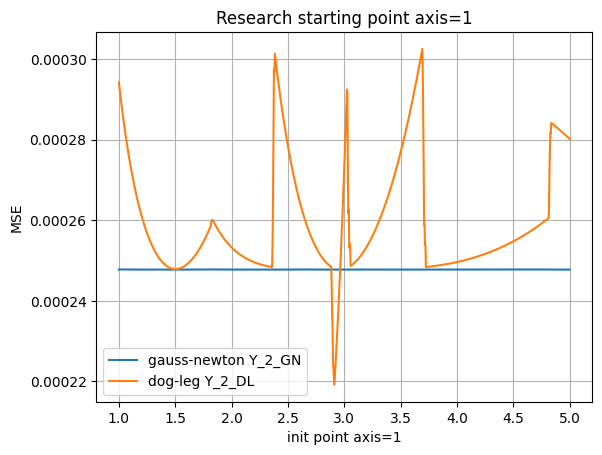

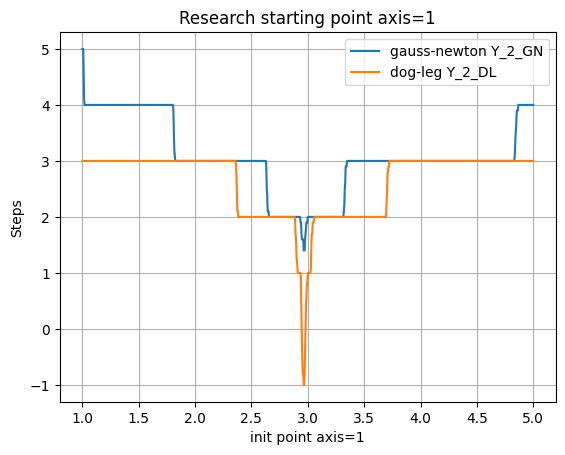

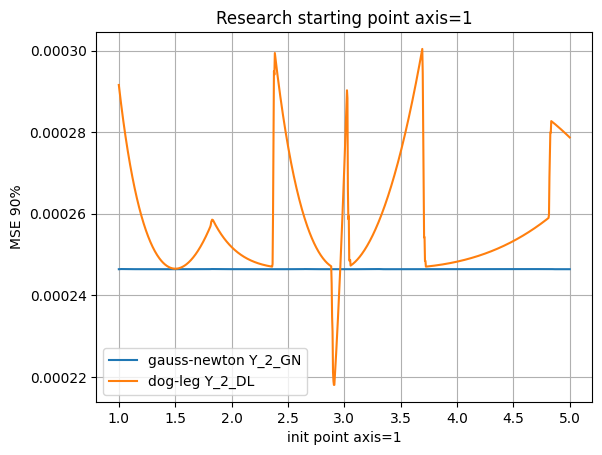

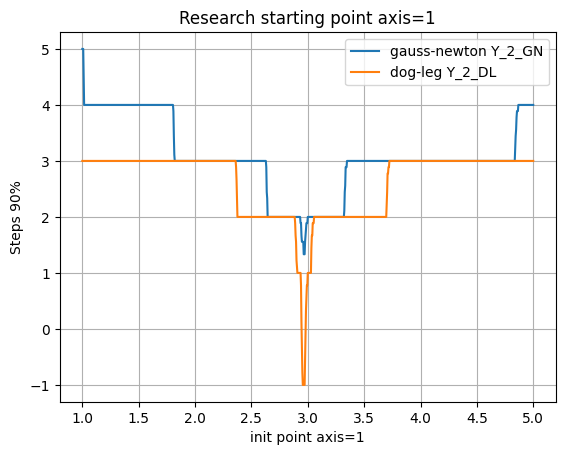

In [20]:
parse_and_print_few(['Y_2_GN', 'Y_2_DL'], axis=1)

[array([[ 2.00000000e+00, -9.70000000e+01,  4.90967968e-03,
         8.00000000e+00,  4.89419359e-03,  8.00000000e+00],
       [ 2.00000000e+00, -9.68000000e+01,  4.90967966e-03,
         8.00000000e+00,  4.89419357e-03,  8.00000000e+00],
       [ 2.00000000e+00, -9.66000000e+01,  4.90967964e-03,
         8.00000000e+00,  4.89419355e-03,  8.00000000e+00],
       ...,
       [ 2.00000000e+00,  1.02600000e+02,  2.47774421e-04,
         8.00000000e+00,  2.46402430e-04,  8.00000000e+00],
       [ 2.00000000e+00,  1.02800000e+02,  2.47774463e-04,
         8.00000000e+00,  2.46402472e-04,  8.00000000e+00],
       [ 2.00000000e+00,  1.03000000e+02,  2.47774506e-04,
         8.00000000e+00,  2.46402514e-04,  8.00000000e+00]]), array([[ 2.00000000e+00, -9.70000000e+01,  1.70134142e+03,
         1.00000000e+00,  1.68840766e+03,  1.00000000e+00],
       [ 2.00000000e+00, -9.68000000e+01,  1.68608904e+03,
         1.00000000e+00,  1.67326845e+03,  1.00000000e+00],
       [ 2.00000000e+00, -9.66000

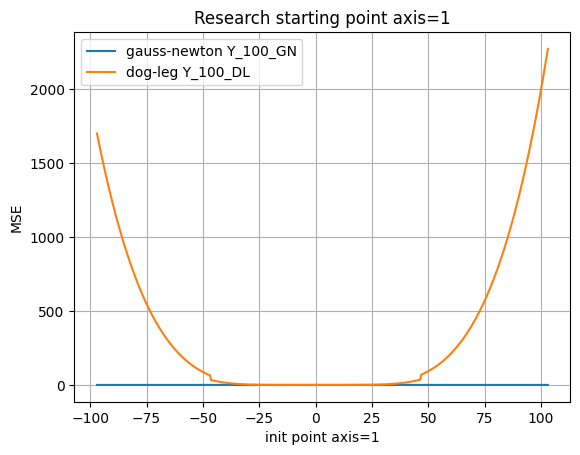

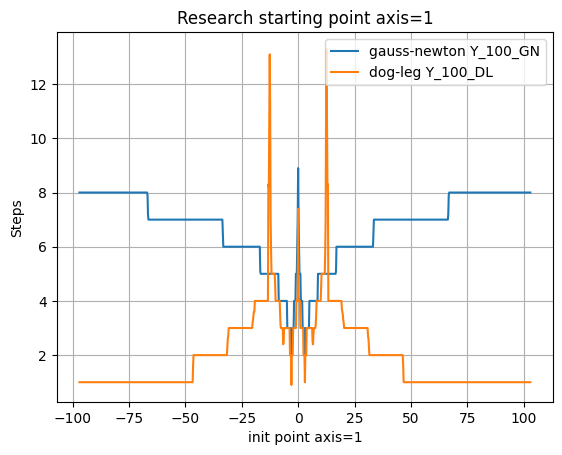

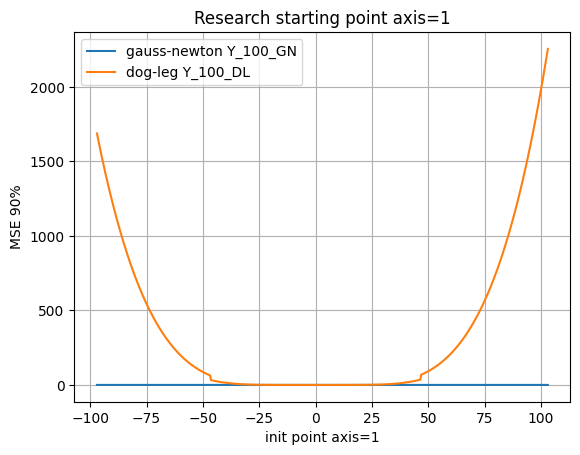

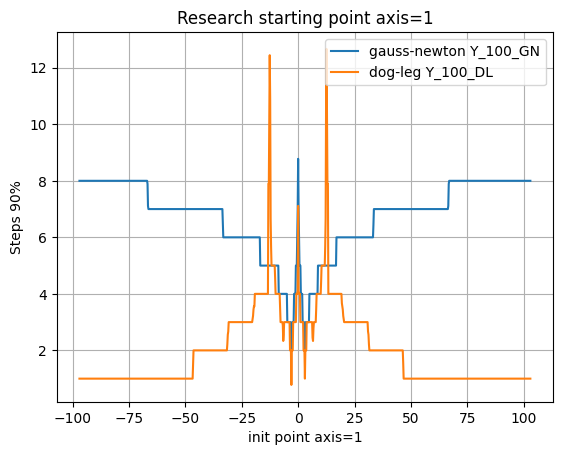

In [21]:
parse_and_print_few(['Y_100_GN', 'Y_100_DL'], axis=1)

[array([[-2.00000000e+00,  3.00000000e+00,  2.47772966e-04,
         3.00000000e+00,  2.46400999e-04,  3.00000000e+00],
       [-1.99200000e+00,  3.00000000e+00,  2.47772966e-04,
         3.00000000e+00,  2.46400999e-04,  3.00000000e+00],
       [-1.98400000e+00,  3.00000000e+00,  2.47772966e-04,
         3.00000000e+00,  2.46400999e-04,  3.00000000e+00],
       ...,
       [ 5.98400000e+00,  3.00000000e+00,  2.47772966e-04,
         3.00000000e+00,  2.46400999e-04,  3.00000000e+00],
       [ 5.99200000e+00,  3.00000000e+00,  2.47772966e-04,
         3.00000000e+00,  2.46400999e-04,  3.00000000e+00],
       [ 6.00000000e+00,  3.00000000e+00,  2.47772966e-04,
         3.00000000e+00,  2.46400999e-04,  3.00000000e+00]]), array([[-2.00000000e+00,  3.00000000e+00,  2.48530909e-04,
         4.00000000e+00,  2.47057087e-04,  4.00000000e+00],
       [-1.99200000e+00,  3.00000000e+00,  2.48526638e-04,
         4.00000000e+00,  2.47053153e-04,  4.00000000e+00],
       [-1.98400000e+00,  3.00000

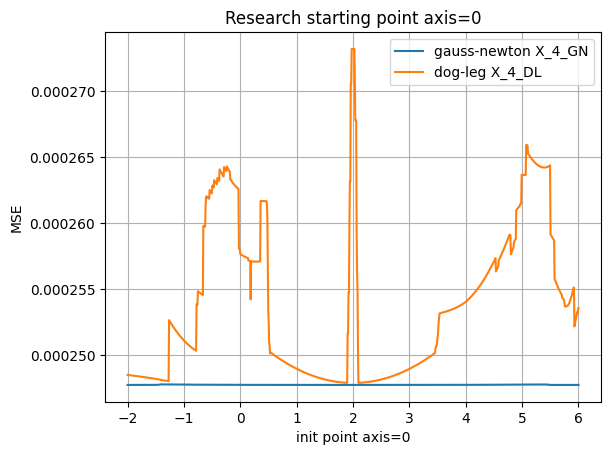

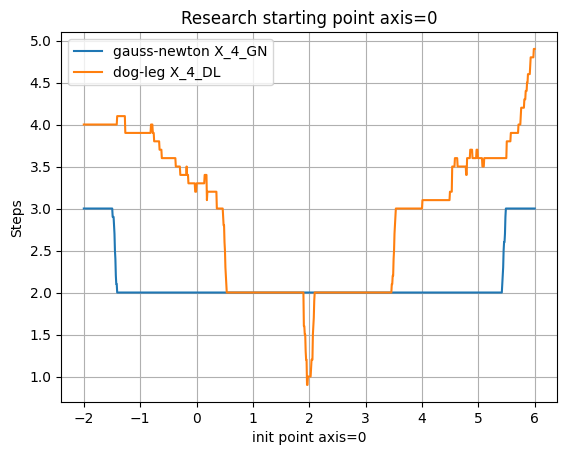

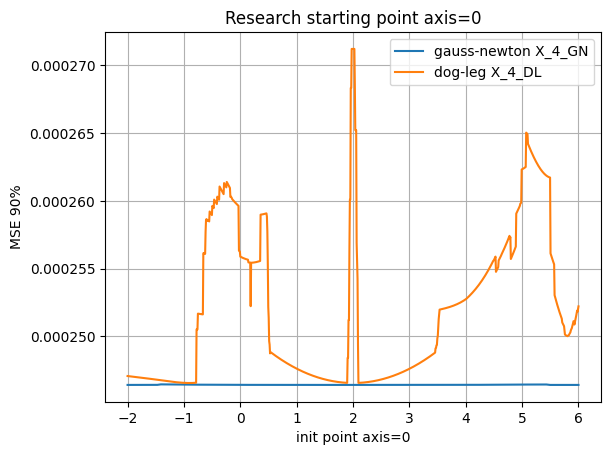

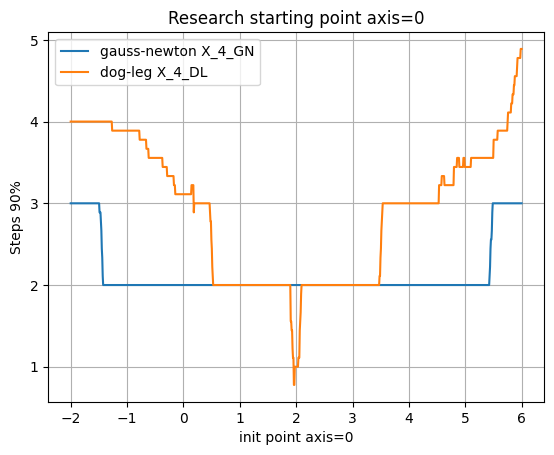

In [22]:
parse_and_print_few(['X_4_GN', 'X_4_DL'])

[array([[-9.80000000e+01,  3.00000000e+00,  2.47772979e-04,
         7.00000000e+00,  2.46401012e-04,  7.00000000e+00],
       [-9.78000000e+01,  3.00000000e+00,  2.47772978e-04,
         7.00000000e+00,  2.46401011e-04,  7.00000000e+00],
       [-9.76000000e+01,  3.00000000e+00,  2.47772977e-04,
         7.00000000e+00,  2.46401010e-04,  7.00000000e+00],
       ...,
       [ 1.01600000e+02,  3.00000000e+00,  2.47772978e-04,
         7.00000000e+00,  2.46401011e-04,  7.00000000e+00],
       [ 1.01800000e+02,  3.00000000e+00,  2.47772979e-04,
         7.00000000e+00,  2.46401012e-04,  7.00000000e+00],
       [ 1.02000000e+02,  3.00000000e+00,  2.47772980e-04,
         7.00000000e+00,  2.46401013e-04,  7.00000000e+00]]), array([[-9.80000000e+01,  3.00000000e+00,  2.73186704e-04,
         1.00000000e+00,  2.71220844e-04,  1.00000000e+00],
       [-9.78000000e+01,  3.00000000e+00,  2.73186704e-04,
         1.00000000e+00,  2.71220844e-04,  1.00000000e+00],
       [-9.76000000e+01,  3.00000

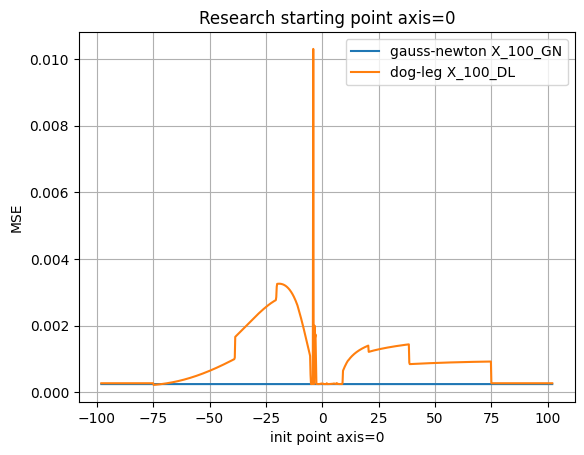

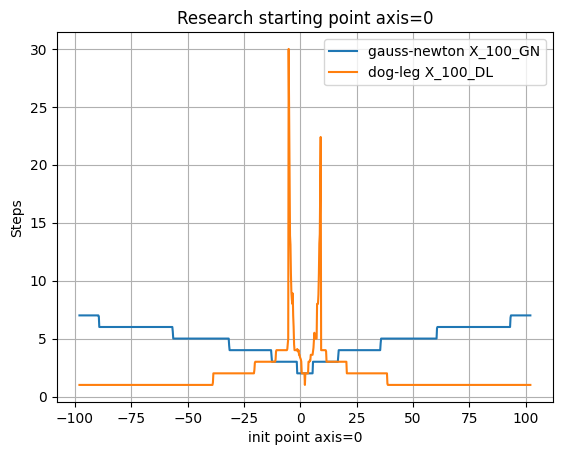

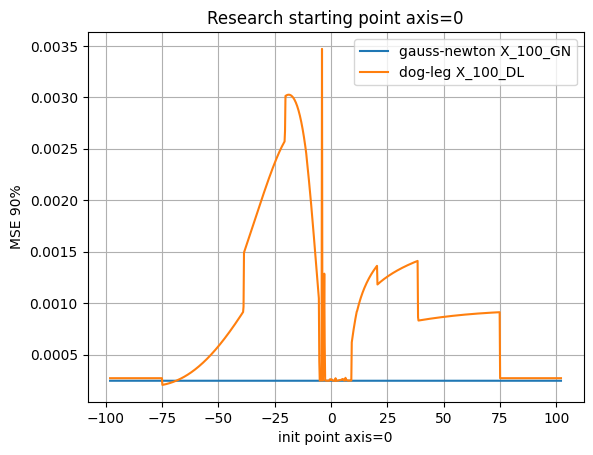

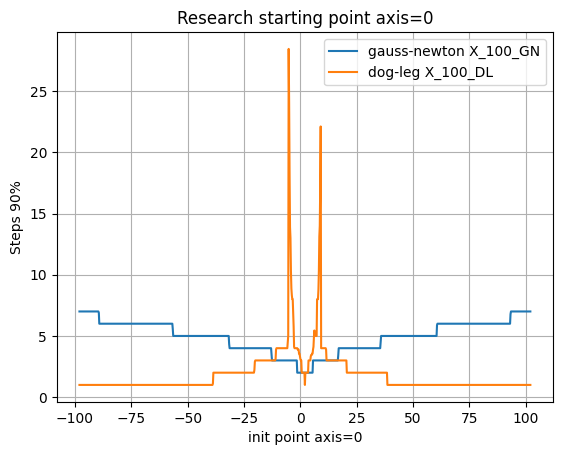

In [23]:
parse_and_print_few(['X_100_GN', 'X_100_DL'])